# Stock Analysis

### Author : 钟智强

#### Objectives
The main objectives of this analysis are:
1. **Data Collection**: Gather historical stock price data for Stocks from a reliable financial data source.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough exploratory data analysis to understand the trends, patterns, and anomalies in  stock prices.
3. **Technical Analysis**: Apply various technical indicators and charting techniques to identify potential trading signals and trends.
4. **Statistical Analysis**: Perform statistical tests and analyses to assess the stock's performance and volatility.
5. **Predictive Modeling**: Develop predictive models to forecast future stock prices based on historical data.
6. **Sentiment Analysis**: Analyze market sentiment related to Stocks by incorporating news and social media data.



1. Get Stocks Information and Price

> Import dependencies

In [212]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

nvidia = yf.Ticker("NVDA")
intel = yf.Ticker("INTC")
meta = yf.Ticker("META")
tme = yf.Ticker("TME")

nvidia_stock_data = nvidia.history(period="1d")
intel_stock_data = intel.history(period="1d")
meta_stock_data = meta.history(period="1d")
tme_stock_data = tme.history(period="1d")

2. Display latest Stock table

In [213]:
current_price = nvidia_stock_data["Close"][0]
open_price = nvidia_stock_data["Open"][0]
high_price = nvidia_stock_data["High"][0]
low_price = nvidia_stock_data["Low"][0]
volume = nvidia_stock_data["Volume"][0]

i_current_price = intel_stock_data["Close"][0]
i_open_price = intel_stock_data["Open"][0]
i_high_price = intel_stock_data["High"][0]
i_low_price = intel_stock_data["Low"][0]
i_volume = intel_stock_data["Volume"][0]

m_current_price = meta_stock_data["Close"][0]
m_open_price = meta_stock_data["Open"][0]
m_high_price = meta_stock_data["High"][0]
m_low_price = meta_stock_data["Low"][0]
m_volume = meta_stock_data["Volume"][0]

t_current_price = tme_stock_data["Close"][0]
t_open_price = tme_stock_data["Open"][0]
t_high_price = tme_stock_data["High"][0]
t_low_price = tme_stock_data["Low"][0]
t_volume = tme_stock_data["Volume"][0]

# Combine data into a single DataFrame
combined_stock_data = {
    "Datetime": current_datetime,
    "Stock Ticker": ["NVDA", "INTC", "META", "TME"],
    "Open Price": [
        f"${open_price:.2f}",
        f"${i_open_price:.2f}",
        f"${m_open_price:.2f}",
        f"${t_open_price:.2f}",
    ],
    "High Price": [
        f"${high_price:.2f}",
        f"${i_high_price:.2f}",
        f"${m_high_price:.2f}",
        f"${t_high_price:.2f}",
    ],
    "Low Price": [
        f"${low_price:.2f}",
        f"${i_low_price:.2f}",
        f"${m_low_price:.2f}",
        f"${t_low_price:.2f}",
    ],
    "Current Price": [
        f"${current_price:.2f}",
        f"${i_current_price:.2f}",
        f"${m_current_price:.2f}",
        f"${t_current_price:.2f}",
    ],
    "Volume": [volume, i_volume, m_volume, t_volume],
}

# Create a DataFrame
df = pd.DataFrame(combined_stock_data)

# Display the DataFrame
display(df)

,Datetime,Stock Ticker,Open Price,High Price,Low Price,Current Price,Volume
0,2024-07-05 22:19:03,NVDA,$127.36,$128.85,$125.68,$126.92,62852481
1,2024-07-05 22:19:03,INTC,$31.40,$31.64,$31.31,$31.42,5774882
2,2024-07-05 22:19:03,META,$512.00,$525.93,$511.61,$524.09,4113594
3,2024-07-05 22:19:03,TME,$14.75,$14.98,$14.61,$14.62,2003021


3. Download Datasets

In [214]:
ticker = "NVDA" # Change this Accordingly

download = False

stock_data = yf.download(ticker, start="2024-05-01", end="2024-07-05")

display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-01,85.077003,86.000000,81.254997,83.041000,83.034180,559863000
2024-05-02,84.448997,86.237000,83.199997,85.817001,85.809952,377898000
2024-05-03,87.789001,89.280998,87.040001,88.789001,88.781708,398341000
2024-05-06,89.389999,92.220001,89.055000,92.139999,92.132431,376203000
2024-05-07,91.098000,91.780998,89.011002,90.554001,90.546562,437342000
2024-05-08,89.483002,91.194000,89.419998,90.412003,90.404579,325721000
2024-05-09,90.528999,91.071999,88.231003,88.747002,88.739716,378013000
2024-05-10,90.305000,91.401001,89.226997,89.877998,89.870613,335325000
2024-05-13,90.477997,90.998001,88.528999,90.399002,90.391579,289680000


4. Process downloaded datasets

In [215]:
stock_data["Date"] = stock_data.index
stock_data["Day"] = stock_data["Date"].apply(lambda x: x.day)
stock_data["Month"] = stock_data["Date"].apply(lambda x: x.month)
stock_data["Year"] = stock_data["Date"].apply(lambda x: x.year)

features = stock_data[["Day", "Month", "Year"]]
target = stock_data["Close"]

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5, random_state=42
)

5. Train Model

### Linear Regression Model

Linear regression is utilized to model the relationship between independent variables (features) and the dependent variable (target, in this case, stock prices). The formula for a simple linear regression can be represented as:

$$
\hat{y} = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$
- **Variables**:
  - \(\hat{y}\): Predicted value (predicted stock price).
  - \(b_0, b_1, \ldots, b_n\): Coefficients determined during model training.
  - \(x_1, x_2, \ldots, x_n\): Input features (day, month, year).

### Mean Squared Error (MSE)

Mean Squared Error measures the average squared difference between predicted values and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Variables**:
  - \(y_i\): Actual values.
  - \(\hat{y}_i\): Predicted values.
  - \(n\): Number of samples.


In [216]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [217]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

display(f"Mean Squared Error: {mse}")

'Mean Squared Error: 48.30719383615678'

6. Visualise the predicted Data.

Data visualization is achieved using Matplotlib to plot actual and predicted stock prices over time:

- **Matplotlib**: Python library for plotting.
- **Subplots**: `plt.subplots(2, 1)` creates two vertically stacked subplots.
- **Plotting**: `ax[0].plot()` and `ax[1].plot()` are used to plot actual and predicted prices, with various styling options (`color`, `alpha`, `linestyle`, `legend`, `grid`) applied for clarity.

### Data Collection and Preparation

- Historical stock price data is fetched using `yfinance` for stocks such as Nvidia (`NVDA`), Intel (`INTC`), Meta (`META`), and Tencent Music (`TME`).
- Data is processed (`DataFrame` manipulation) to extract features (`Day`, `Month`, `Year`) and the target variable (`Close` price).


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

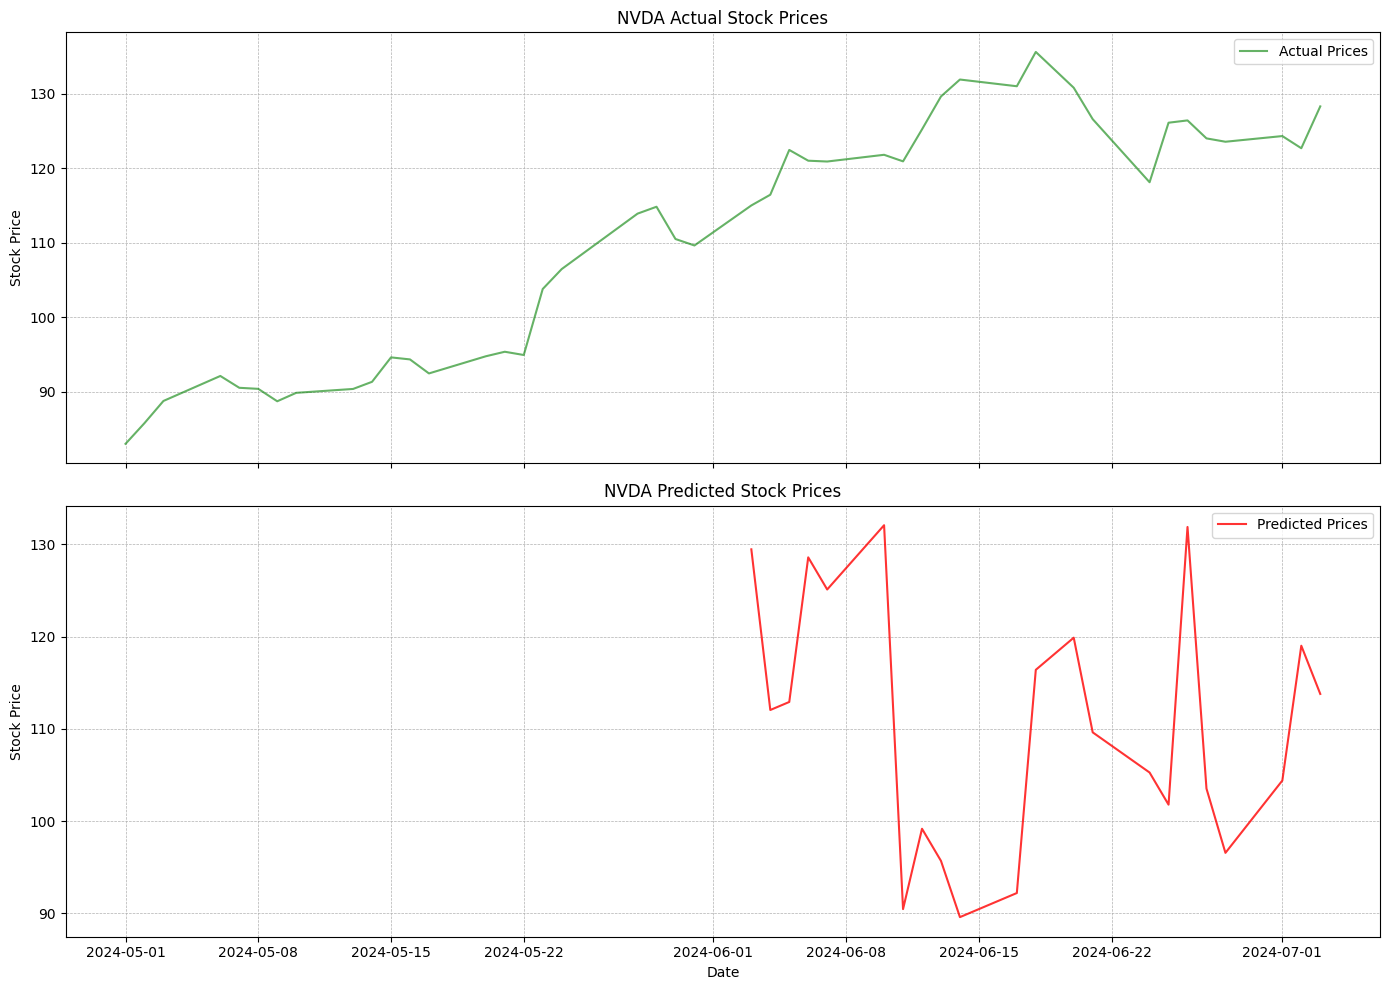

In [218]:
from matplotlib.dates import DateFormatter

# Create a new DataFrame to hold the dates and predictions
pred_df = pd.DataFrame(
    {
        "Date": stock_data["Date"][len(stock_data) - len(predictions) :],
        "Predicted": predictions,
    }
)

# Set up the subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot actual prices
ax[0].plot(
    stock_data["Date"],
    stock_data["Close"],
    label="Actual Prices",
    color="green",
    alpha=0.6,
)
ax[0].set_ylabel("Stock Price")
ax[0].set_title(f"{ticker} Actual Stock Prices")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)

ax[1].plot(
    pred_df["Date"],
    pred_df["Predicted"],
    label="Predicted Prices",
    color="red",
    linestyle="-",
    alpha=0.8,
)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Stock Price")
ax[1].set_title(f"{ticker} Predicted Stock Prices")
ax[1].legend()
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

display(plt)

Output Current Price of selected Stock to csv

In [219]:
if download: md_data = stock_data.to_csv(f"output/{ticker}_Price-{current_datetime}", index=False) 

Calculate Moving Averages

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

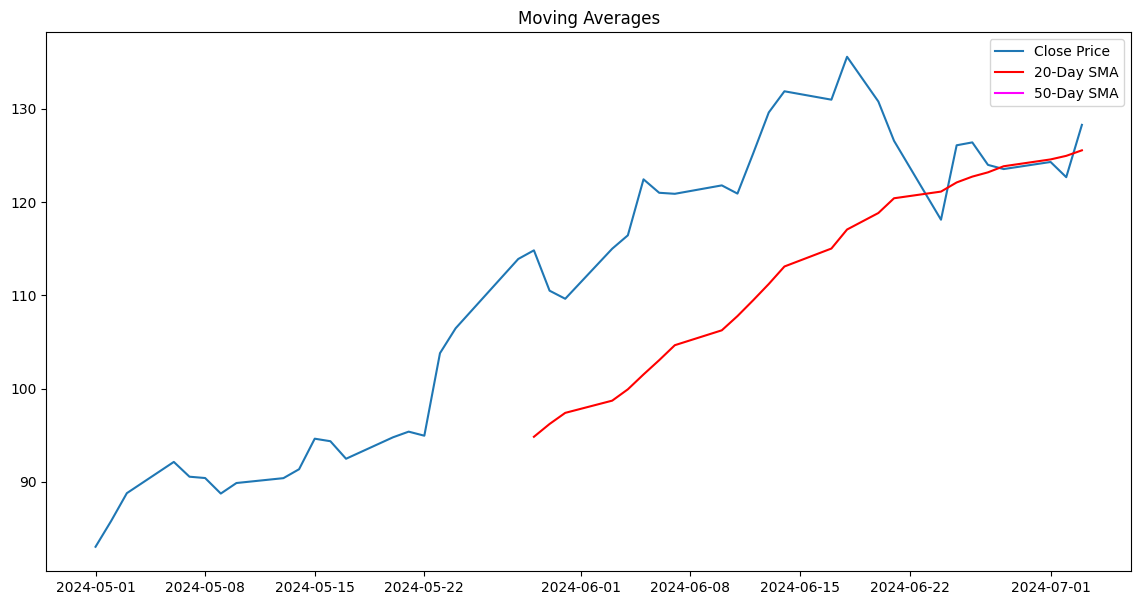

In [220]:
# Calculate Moving Averages
stock_data["20_SMA"] = stock_data["Close"].rolling(window=20).mean()
stock_data["50_SMA"] = stock_data["Close"].rolling(window=50).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["20_SMA"], label="20-Day SMA", color="red")
plt.plot(stock_data["50_SMA"], label="50-Day SMA", color="magenta")
plt.title("Moving Averages")
plt.legend()

display(plt)

7. Market Sentiment Analysis

Gather comprehensive news and updates about the stock market, conduct in-depth analysis, and provide detailed insights and forecasts.

In [221]:
# Fetch stock news
def fetch_stock_news(ticker):
    api_key = os.getenv("NEWS_API_KEY")
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey={api_key}"
    response = requests.get(url)
    news_data = response.json()
    return news_data["articles"]


def sentiment_text(value):
    match value:
        case value if value < 0:
            return "Negative"
        case value if value == 0:
            return "Neutral"
        case value if value > 0:
            return "Positive"


# Analyze sentiment
def analyze_sentiment(articles):
    sentiment_scores = []
    for article in articles:
        title = article["title"] if article["title"] else ""
        description = article["description"] if article["description"] else ""
        text = title + " " + description
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_scores.append(sentiment)
    return sentiment_scores

# Fetch and analyze news for a specific stock
articles = fetch_stock_news(ticker)
sentiment_scores = analyze_sentiment(articles)
average_sentiment = np.mean(sentiment_scores)
sentiment_score_text = sentiment_text(average_sentiment)

# Display sentiment summary
display(f"{ticker}: Average Sentiment: {average_sentiment} | {sentiment_score_text}")

# Prepare articles for display in a table
article_data = []
for article in articles:
    article_data.append(
        {
            "Article Title": article.get("title", "N/A"),
            "Article Description": article.get("description", "N/A"),
            "Article URL": article.get("url", "N/A"),
        }
    )

# Create a DataFrame and display it
df_articles = pd.DataFrame(article_data)
top_10_articles = df_articles.head(10)
display(top_10_articles)


if download:
    # # Save the top 10 articles to a CSV file
    top_10_articles.to_csv("output/top_10_articles.csv", index=False)

    # # Read the CSV file back into a DataFrame
    read_df = pd.read_csv("output/top_10_articles.csv")
    display(read_df)

    # Convert DataFrame to Markdown format
    markdown_table = read_df.to_markdown(index=False)

    # Save the Markdown table to a .md file
    file_name = f"output/Top_news_affected_{ticker}_{current_datetime}.md"

    with open(file_name, "w") as f:
        f.write(markdown_table)

display(df_articles)

'NVDA: Average Sentiment: 0.0904701954064454 | Positive'

,Article Title,Article Description,Article URL
0,Nvidia's stock plunge erases $118B in market cap,Nvidia's (NVDA) reign as the most valuable pub...,https://finance.yahoo.com/video/nvidias-stock-...
1,Elon Musk ordered Nvidia to prioritize chips f...,Tesla (TSLA) CEO Elon Musk reportedly ordered ...,https://finance.yahoo.com/video/elon-musk-orde...
2,ETFs to Tap on NVIDIA's 10-for-1 Stock Split R...,NVIDIA (NVDA) is making a series of new record...,https://finance.yahoo.com/news/etfs-tap-nvidia...
3,Nvidia: Why investors are shorting the stock a...,Nvidia's (NVDA) market cap briefly surpassed $...,https://finance.yahoo.com/video/nvidia-why-inv...
4,Investors should shift into 'undervalued' sect...,"As markets (^DJI, ^IXIC, ^GSPC) face pressure ...",https://finance.yahoo.com/video/investors-shif...
5,Nvidia's longevity reliant on enterprise deman...,Nvidia's (NVDA) stock is under pressure Friday...,https://finance.yahoo.com/video/nvidias-longev...
6,Nvidia short sellers make $5 billion from thre...,The stock has slumped 13% and lost $430 billio...,https://finance.yahoo.com/news/nvidia-short-se...
7,AI coins bubble deflates as Google search inte...,"The market for AI coins, such as Fetch.ai (FET...",https://readwrite.com/ai-coins-bubble-deflates...
8,"As Nvidia, Apple Grab Headlines, This Mag 7 La...",While laying an AI foundation with Amazon Bedr...,https://www.investors.com/research/ibd-stock-a...
9,NVIDIA Splits 10-to-1; Non-farm Payrolls on De...,NVIDIA still carries a Zacks Rank of #1 (Stron...,https://finance.yahoo.com/news/nvidia-splits-1...


,Article Title,Article Description,Article URL
0,Nvidia's stock plunge erases $118B in market cap,Nvidia's (NVDA) reign as the most valuable pub...,https://finance.yahoo.com/video/nvidias-stock-...
1,Elon Musk ordered Nvidia to prioritize chips f...,Tesla (TSLA) CEO Elon Musk reportedly ordered ...,https://finance.yahoo.com/video/elon-musk-orde...
2,ETFs to Tap on NVIDIA's 10-for-1 Stock Split R...,NVIDIA (NVDA) is making a series of new record...,https://finance.yahoo.com/news/etfs-tap-nvidia...
3,Nvidia: Why investors are shorting the stock a...,Nvidia's (NVDA) market cap briefly surpassed $...,https://finance.yahoo.com/video/nvidia-why-inv...
4,Investors should shift into 'undervalued' sect...,"As markets (^DJI, ^IXIC, ^GSPC) face pressure ...",https://finance.yahoo.com/video/investors-shif...
...,...,...,...
95,NVIDIA Takes The Throne: Is This A Tech Bubble?,"NVIDIA, at over $3.1 trillion, became the worl...",https://www.forbes.com/sites/bill_stone/2024/0...
96,AI Momentum Fuels HPE's Return To Revenue Grow...,"On Tuesday, Hewlett Packard Enterprise (NYSE: ...",https://www.benzinga.com/news/24/06/39204383/a...
97,輝達回檔吸引散戶逢低搶進，NVDL 成交量大增,輝達（Nvidia Corp.）股價連跌三個交易日、本週一度陷入修正（即從前波高拉回 10%...,https://finance.technews.tw/2024/06/26/retail-...
98,Impact Of The Fed Meeting On Stocks,May CPI helped markets shrug off the hawkish F...,https://www.forbes.com/sites/bill_stone/2024/0...
